In [40]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import operator
import random

Declaração das Constantes

In [41]:
SIZE_MATRIX = 3 * 3
SIZE_POPULATION = 20
COURT = 6

Gerando individuos aleatoriamente

In [42]:
individuals = np.random.randint(0,2,(SIZE_POPULATION, SIZE_MATRIX))
print(individuals)

[[1 0 1 0 1 0 1 0 0]
 [0 1 1 1 1 0 1 0 1]
 [0 0 1 1 0 0 0 0 0]
 [1 0 1 1 1 1 1 0 0]
 [1 0 1 1 1 1 0 1 0]
 [0 0 1 1 1 1 1 0 0]
 [1 1 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 1 1 1]
 [1 1 0 0 1 1 0 1 1]
 [1 0 0 1 0 1 1 1 1]
 [0 1 0 0 1 0 1 0 1]
 [0 0 1 1 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0]
 [1 1 1 0 1 1 0 0 1]
 [1 0 0 1 0 0 1 0 1]
 [1 1 0 0 1 0 1 1 0]
 [1 0 1 1 0 1 1 1 1]
 [1 0 0 1 1 1 1 1 0]
 [1 0 1 0 1 0 1 1 0]
 [1 1 1 0 1 1 0 1 1]]


Gerando genótipo aleatoriamente

In [43]:
genotype = np.random.randint(0,2, SIZE_MATRIX)
print(genotype)

[0 1 0 0 0 1 0 1 1]


Coparando os genes iguais

In [44]:
def generate_truth_table(individuals, genotype):
    return individuals == genotype

Somando para pegar os indivíduos com maior número de genes iguas

In [45]:
def sum_individuals (truth_table):
    return np.sum(truth_table, axis=1)

Gerando um dicionário para ordenar os elementos

In [46]:
def sort_individuals(sum_i):
    dic = {}
    for i in range(len(sum_i)):
        dic[i] = sum_i[i]

    return sorted(dic.items(), key=operator.itemgetter(1))

Função de crossover

In [47]:
def crossover(individuals, sorted_d):
    i = 0
    while i < len(individuals):
        j = COURT
        while j < SIZE_MATRIX:
            gene_parent_1 = individuals[sorted_d[i][0]][j]
            gene_parent_2 = individuals[sorted_d[i + 1][0]][j]
             
            individuals[sorted_d[i][0]][j] = gene_parent_2
            individuals[sorted_d[i + 1][0]][j] = gene_parent_1

            j += 1 


        i += 2
    return individuals



Função de mutação

In [48]:
def mutation(individuals):
    for i in range(SIZE_POPULATION):
        n = random.randint(0, SIZE_MATRIX -1)
        individuals[i][n] = int(not individuals[i][n])
    return individuals


Algorítimo genético

In [49]:
def genetic_algorithm(individuals, genotype):
    truth_table = generate_truth_table(individuals, genotype)
    sum_i = sum_individuals(truth_table)
    sorted_d = sort_individuals(sum_i)
    individuals = crossover(individuals, sorted_d)
    individuals = mutation(individuals)
    return individuals

Verificar se existe o genótipo na lista de indivíduos

In [50]:
def exists_genotype_in_individuos(individuals, genotype):
    truth_table = generate_truth_table(individuals, genotype)
    sum_i = sum_individuals(truth_table)
    for i in range(SIZE_POPULATION):
        if(sum_i[i] == SIZE_MATRIX):
            return True, i
    else: return False

In [51]:
individuals = genetic_algorithm(individuals, genotype)
exits_genotype = exists_genotype_in_individuos(individuals, genotype)
individual = {}
while not exits_genotype:
    individuals = genetic_algorithm(individuals, genotype)
    exits_genotype = exists_genotype_in_individuos(individuals, genotype)

Genótipo e indivíduo

In [52]:
print(genotype)
individual = individuals[exits_genotype[1]]
print(individual)

[0 1 0 0 0 1 0 1 1]
[0 1 0 0 0 1 0 1 1]


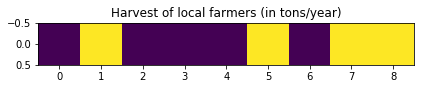

In [53]:
fig, ax = plt.subplots()
im = ax.imshow(np.asmatrix(individual))
ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

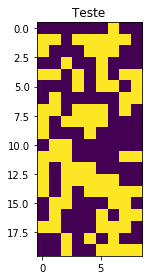

In [54]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

im = ax.imshow(individuals)
ax.set_title("Teste")
fig.tight_layout()

line, = ax.plot([], [], lw=2)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    return (ax.imshow(np.random.randint(0,2,(9,9))),)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
anim